### 붕괴사고 API 입력 파라미터 정보

| 항목명(국문)         | 항목명(영문)   | 타입      | 항목크기 | 항목구분 | 항목설명                |
|:--------------------|:--------------|:----------|:---------|:---------|:------------------------|
| 서비스키            | serviceKey    | STRING    | 50       | Y        | 서비스키                |
| 페이지당개수        | numOfRows     | NUMBER    | 30       | N        | 페이지당개수            |
| 페이지번호          | pageNo        | NUMBER    | 30       | N        | 페이지번호              |
| 응답타입(json,xml) | returnType    | VARCHAR   | 30       | N        | 응답타입(json,xml)      |

In [1]:
import requests
import urllib3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib
from pyproj import Transformer

### 붕괴사고 데이터 컬럼 정보

| 항목명(국문) | 항목명(영문)      | 타입   | 항목크기 | 항목구분 | 항목설명     |
|:------------|:------------------|:-------|:---------|:---------|:-------------|
| 일련번호    | SN                |        | 22       | Y        | 일련번호     |
| 발생연도    | OCRN_YR           |        | 4        | Y        | 발생연도     |
| 발생월      | OCRN_MM           |        | 2        | Y        | 발생월       |
| 발생일자    | OCRN_YMD          |        | 8        | Y        | 발생일자     |
| 주소        | ADDR              |        | 200      | Y        | 주소         |
| 도로명주소  | ROAD_NM_ADDR      |        | 200      | Y        | 도로명주소   |
| 사유        | RSN_              |        | 256      | Y        | 사유         |
| 사상자수    | CSTS_CNT          |        | 22       | Y        | 사상자수     |
| 사망자수    | DCSD_CNT          |        | 10       | Y        | 사망자수     |
| 부상자수    | INJPSN_CNT        |        | 10       | Y        | 부상자수     |
| 피해금액    | DAM_AMT           |        | 15       | Y        | 피해금액     |
| X지도좌표   | XMAP_CRTS         |        | 22       | Y        | X지도좌표    |
| Y지도좌표   | YMAP_CRTS         |        | 22       | Y        | Y지도좌표    |
| 지오메트리  | GEOM              |        |          | Y        | 지오메트리   |

In [2]:
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

url = "https://www.safetydata.go.kr/V2/api/DSSP-IF-00078"
serviceKey = "42G92N0Y97700R57"
payloads = {
    "serviceKey": serviceKey,
    "returnType": "json",
    "pageNo": "1",
    "numOfRows": "1000",
    
}

response = requests.get(url, params=payloads)
response.json()

{'header': {'resultMsg': 'NORMAL SERVICE',
  'resultCode': '00',
  'errorMsg': None},
 'numOfRows': 1000,
 'pageNo': 1,
 'totalCount': 714,
 'body': [{'OCRN_YR': '2012',
   'OCRN_YMD': '17      ',
   'DAM_AMT': 0,
   'DCSD_CNT': 0,
   'OCRN_MM': '09',
   'ADDR': '울산광역시 울주군 상북면 이천리 142',
   'CSTS_CNT': 0,
   'YMAP_CRTS': 4241840.0736,
   'ROAD_NM_ADDR': None,
   'RSN_': '폭우 인한 하천제방유실',
   'XMAP_CRTS': 14362644.9529,
   'SN': 145,
   'GEOM': 'POINT(14362644.9529 4241840.0735999998)',
   'INJPSN_CNT': 0},
  {'OCRN_YR': '2012',
   'OCRN_YMD': '17      ',
   'DAM_AMT': 0,
   'DCSD_CNT': 0,
   'OCRN_MM': '09',
   'ADDR': '울산광역시 울주군 상북면 이천리 60',
   'CSTS_CNT': 0,
   'YMAP_CRTS': 4239957.4817,
   'ROAD_NM_ADDR': None,
   'RSN_': '폭우 인한 하천제방유실',
   'XMAP_CRTS': 14362372.7434,
   'SN': 146,
   'GEOM': 'POINT(14362372.7434 4239957.4817000004)',
   'INJPSN_CNT': 0},
  {'OCRN_YR': '2012',
   'OCRN_YMD': '17      ',
   'DAM_AMT': 0,
   'DCSD_CNT': 0,
   'OCRN_MM': '09',
   'ADDR': '울산광역시 울주군 상북면 명촌리

In [3]:
df = pd.DataFrame(response.json().get('body', {}))
df

,OCRN_YR,OCRN_YMD,DAM_AMT,DCSD_CNT,OCRN_MM,ADDR,CSTS_CNT,YMAP_CRTS,ROAD_NM_ADDR,RSN_,XMAP_CRTS,SN,GEOM,INJPSN_CNT
0,2012,17,0,0,09,울산광역시 울주군 상북면 이천리 142,0,4.241840e+06,None,폭우 인한 하천제방유실,1.436264e+07,145,POINT(14362644.9529 4241840.0735999998),0
1,2012,17,0,0,09,울산광역시 울주군 상북면 이천리 60,0,4.239957e+06,None,폭우 인한 하천제방유실,1.436237e+07,146,POINT(14362372.7434 4239957.4817000004),0
2,2012,17,0,0,09,울산광역시 울주군 상북면 명촌리 162-4,0,4.241778e+06,None,폭우 인한 구거제방유실,1.437019e+07,147,POINT(14370194.937899999 4241777.9139999999),0
3,2012,17,57500,0,09,경상남도 창원시 의창구 북면 무동리 산5,0,4.207956e+06,None,태풍 산바 영향에 따른 집중호우 등,1.431447e+07,148,POINT(14314471.8432 4207955.6061000004),0
4,2012,17,0,0,09,울산광역시 울주군 상북면 길천리 896,0,4.243306e+06,None,폭우 인한 농로세굴,1.436926e+07,149,POINT(14369258.162 4243306.4437999995),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,2021,05,0,0,07,경상남도 고성군 회화면 녹명리 산98,0,4.173214e+06,None,폭우로 인한 임야사면 유실,1.428912e+07,710,POINT(14289121.0101 4173214.3226999999),0
710,2021,05,0,0,07,경상남도 고성군 마암면 성전리 산78,0,4.174485e+06,None,폭우로 인한 임야사면 유실,1.428406e+07,711,POINT(14284057.3091 4174485.0029000002),0
711,2021,07,0,0,07,전라남도 여수시 소라면 죽림리 1122-2,0,4.132170e+06,None,폭우로 인한 법면 유실,1.420875e+07,712,POINT(14208748.1708 4132169.8108000001),0
712,2021,23,0,0,08,경상남도 고성군 마암면 화산리 산47,0,4.172758e+06,None,폭우로 인한 임야사면 유실,1.428724e+07,713,POINT(14287240.601299999 4172758.1538999998),0


In [4]:
from collections import Counter

# 'OCRN_YR' 컬럼이 존재한다고 가정
year_counts = Counter(df['OCRN_MM'])
print(year_counts)

# 보기 좋게 DataFrame으로 변환하여 출력
pd.DataFrame(year_counts.items(), columns=['발생월', '건수']).sort_values('발생월').reset_index(drop=True)

Counter({'08': 281, '07': 137, '09': 93, '02': 39, '03': 27, '06': 27, '05': 23, '10': 22, '04': 19, '12': 19, '11': 16, '01': 10, None: 1})


,발생월,건수
0,01,10
1,02,39
2,03,27
3,04,19
4,05,23
5,06,27
6,07,137
7,08,281
8,09,93
9,10,22


In [5]:
# df.to_csv("data/붕괴사고.csv", encoding='utf-8-sig', index=False)

In [6]:
address = "강원특별자치도 강릉시 강동면 모전리 4번지 1982-3712"
add_list = address.split(" ")
do = add_list[0]
gu = add_list[1]
if (str([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) not in add_list[3]):
    dong = add_list[2] + " " + add_list[3]
else : 
    dong = add_list[2]

print(add_list)
print(do)
print(gu)
print(dong)

['강원특별자치도', '강릉시', '강동면', '모전리', '4번지', '1982-3712']
강원특별자치도
강릉시
강동면 모전리


인천광역시 중구 도원동 71-65번지

In [7]:
merged_df = pd.read_csv("data/merged_data.csv", encoding='utf-8-sig')
merged_df

,Unnamed: 0,ADDR,bun,ji,region_cd,소방청 / 화재·구조·구급 통계시스템,OCRN_YMD,DAM_AMT,DCSD_CNT,OCRN_MM,CSTS_CNT,YMAP_CRTS,ROAD_NM_ADDR,RSN_,XMAP_CRTS,SN,GEOM,INJPSN_CNT
0,0,강원특별자치도 속초시 영랑동 1-6,1.0,6.0,5121010100,2014.0,3.0,2000,0,9.0,0,4609705.210,NaN,집중호우로 인한 낙석발생으로 상가건물 지붕 및 벽체 일부 파손,14315719.69,394,POINT(14315719.689200001 4609705.2095999997),0
1,1,강원특별자치도 양양군 서면 서림리 산 1-19,1.0,19.0,5183031035,2015.0,25.0,75000,0,8.0,0,4574806.158,NaN,집중호우로 인한 붕괴,14306516.68,435,POINT(14306516.6843 4574806.1580999997),0
2,2,강원특별자치도 영월군 주천면 판운리 1377-17,1377.0,17.0,5175036022,2016.0,2.0,10000,0,2.0,0,4479360.803,NaN,해빙기 낙석,14284882.74,440,POINT(14284882.743100001 4479360.8031000001),0
3,3,강원특별자치도 춘천시 서면 덕두원리 산 29-3,29.0,3.0,5111035028,2015.0,25.0,40000,0,7.0,0,4558907.534,NaN,집중호우로 인한 비탈면 붕괴,14212544.11,430,POINT(14212544.1097 4558907.5335999997),0
4,4,강원특별자치도 춘천시 서면 덕두원리 산 4-1,4.0,1.0,5111035028,2015.0,25.0,60000,0,7.0,0,4561313.903,NaN,집중호우로 인한 비탈면 붕괴,14212941.97,429,POINT(14212941.965600001 4561313.9031999996),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,686,경상남도 고성군 회화면 녹명리 산98,98.0,NaN,4882040026,2021.0,5.0,0,0,7.0,0,4173214.323,NaN,폭우로 인한 임야사면 유실,14289121.01,710,POINT(14289121.0101 4173214.3226999999),0
687,687,경상남도 고성군 마암면 성전리 산78,78.0,NaN,4882041027,2021.0,5.0,0,0,7.0,0,4174485.003,NaN,폭우로 인한 임야사면 유실,14284057.31,711,POINT(14284057.3091 4174485.0029000002),0
688,688,전라남도 여수시 소라면 죽림리 1122-2,1122.0,2.0,4613031022,2021.0,7.0,0,0,7.0,0,4132169.811,NaN,폭우로 인한 법면 유실,14208748.17,712,POINT(14208748.1708 4132169.8108000001),0
689,689,경상남도 고성군 마암면 화산리 산47,47.0,NaN,4882041024,2021.0,23.0,0,0,8.0,0,4172758.154,NaN,폭우로 인한 임야사면 유실,14287240.60,713,POINT(14287240.601299999 4172758.1538999998),0


In [8]:
# bun, ji 컬럼을 int로 변환 후 str로 변환 (결측치는 공백 처리)
def to_int_str(x):
    try:
        if pd.isnull(x) or str(x).strip() == '':
            return ''
        return str(int(float(x)))
    except:
        return ''

merged_df['bun'] = merged_df['bun'].apply(to_int_str)
merged_df['ji'] = merged_df['ji'].apply(to_int_str)
merged_df[['bun', 'ji']].head()

,bun,ji
0,1,6
1,1,19
2,1377,17
3,29,3
4,4,1


In [9]:
# bun, ji 컬럼을 4자리 0패딩 문자열로 변환 (빈 값은 그대로 공백 처리)
merged_df['bun'] = merged_df['bun'].apply(lambda x: str(x).zfill(4) if str(x).strip() else "")
merged_df['ji'] = merged_df['ji'].apply(lambda x: str(x).zfill(4) if str(x).strip() else "")
merged_df[['bun', 'ji']].head()

,bun,ji
0,0001,0006
1,0001,0019
2,1377,0017
3,0029,0003
4,0004,0001


In [10]:
str(merged_df["region_cd"][0])[:5]

'51210'

In [11]:
# API 응답에서 platPlc, strctCdNm, etcRoof, stcnsDay, grndFlrCnt 컬럼 추출 및 merged_df에 추가 (stcnsDay 없으면 pmsDay, useAprDay, pmsnoYear 순서로 대체)
result_cols = ['platPlc', 'strctCdNm', 'etcRoof', 'stcnsDay', 'grndFlrCnt']
results = {col: [] for col in result_cols}
# stcnsDay 대체용 컬럼
stcnsDay_final = []

serviceKey = 'g1HjXk/L4syqtZoq8pJpI6wqHmgBXJM6G6zRQkYv03RyXXpfvtJajTP4zRKiC6K5r0HB+JWK7O3jWCAhoadf7w=='

for index_ in range(len(merged_df)):
    sigunguCd = str(merged_df["region_cd"][index_])[:5]
    bjdongCd = str(merged_df["region_cd"][index_])[5:]
    bunCd = str(merged_df['bun'][index_])
    jiCd = str(merged_df['ji'][index_])
    ocrn_ymd = merged_df["OCRN_YMD"][index_]

    params = {
        'serviceKey': serviceKey,
        'sigunguCd': sigunguCd,
        'bjdongCd': bjdongCd,
        'platGbCd': '',
        'bun': bunCd,
        'ji': jiCd,
        'startDate': '',
        'endDate': '',
        '_type': 'json',
        'numOfRows': '1000',
        'pageNo': '1'
    }

    url = 'http://apis.data.go.kr/1613000/BldRgstHubService/getBrTitleInfo'
    response = requests.get(url, params=params)

    data = response.json().get('response', {}).get('body', {}).get('items', {}).get('item', [])
    if isinstance(data, dict):
        data = [data]
    if data and isinstance(data, list):
        item = data[0]
    else:
        item = {}

    # 결과 컬럼에 해당하는 값 추출
    for col in result_cols:
        results[col].append(item.get(col, ''))

    # stcnsDay 대체 로직
    val = item.get('stcnsDay', '')
    if val and str(val).strip():
        stcnsDay_final.append(val)
    else:
        # 대체 후보 순서대로
        for alt_col in ['pmsDay', 'useAprDay', 'pmsnoYear']:
            alt_val = item.get(alt_col, '')
            if alt_val and str(alt_val).strip():
                stcnsDay_final.append(alt_val)
                break
        else:
            stcnsDay_final.append('')

# 결과를 merged_df에 컬럼으로 추가
for col in result_cols:
    merged_df[col] = results[col]
# stcnsDay_final 컬럼 추가
merged_df['stcnsDay_final'] = stcnsDay_final

merged_df[['platPlc', 'strctCdNm', 'etcRoof', 'stcnsDay', 'grndFlrCnt', 'stcnsDay_final']].head()

,platPlc,strctCdNm,etcRoof,stcnsDay,grndFlrCnt,stcnsDay_final
0,,,,,,
1,,,,,,
2,,,,,,
3,,,,,,
4,,,,,,


In [12]:
merged_df.to_csv("data/merged_data_with_details.csv", encoding='utf-8-sig', index=False)

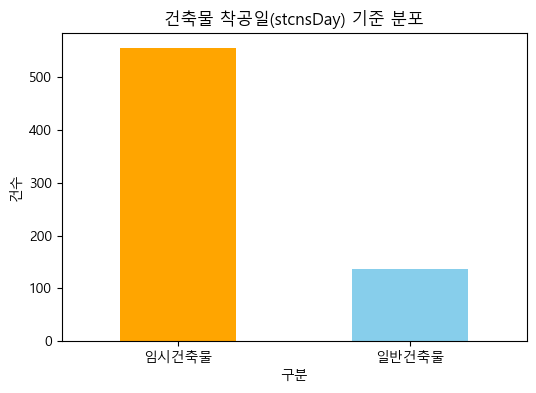

In [13]:
# stcnsDay 값이 없는 경우 '임시건축물'로, 있는 경우 '일반건축물'로 구분하여 시각화
import matplotlib.pyplot as plt
import pandas as pd
# 한글 폰트 설정 (Windows 기준, 나눔고딕 사용)
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# stcnsDay가 결측치 또는 빈 문자열이면 '임시건축물', 아니면 '일반건축물'로 분류
merged_df['건축물구분'] = merged_df['stcnsDay'].apply(lambda x: '임시건축물' if pd.isnull(x) or str(x).strip() == '' else '일반건축물')

# 분포 집계
count = merged_df['건축물구분'].value_counts()

# 시각화
plt.figure(figsize=(6,4))
count.plot(kind='bar', color=['orange', 'skyblue'])
plt.title('건축물 착공일(stcnsDay) 기준 분포')
plt.xlabel('구분')
plt.ylabel('건수')
plt.xticks(rotation=0)
plt.show()

임시건축물(착공일 없음) 건수: 555


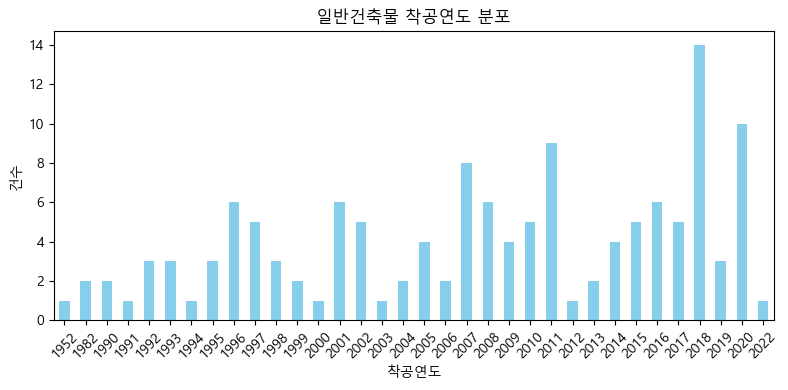

In [14]:
# 임시건축물/일반건축물 각각의 착공일(stcnsDay) 분포 시각화
import matplotlib.pyplot as plt
import pandas as pd
# 한글 폰트 설정 (Windows 기준, 나눔고딕 사용)
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# 임시건축물 개수(착공일 없음)
temp_count = (merged_df['건축물구분'] == '임시건축물').sum()
print(f'임시건축물(착공일 없음) 건수: {temp_count}')

# 일반건축물의 착공일 분포 (연도별)
normal_df = merged_df[merged_df['건축물구분'] == '일반건축물'].copy()
normal_df['착공연도'] = normal_df['stcnsDay'].str[:4]
year_count = normal_df['착공연도'].value_counts().sort_index()

plt.figure(figsize=(8,4))
year_count.plot(kind='bar', color='skyblue')
plt.title('일반건축물 착공연도 분포')
plt.xlabel('착공연도')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

사유구분   비자연재해  자연재해
건축물구분             
일반건축물     60    76
임시건축물    144   411


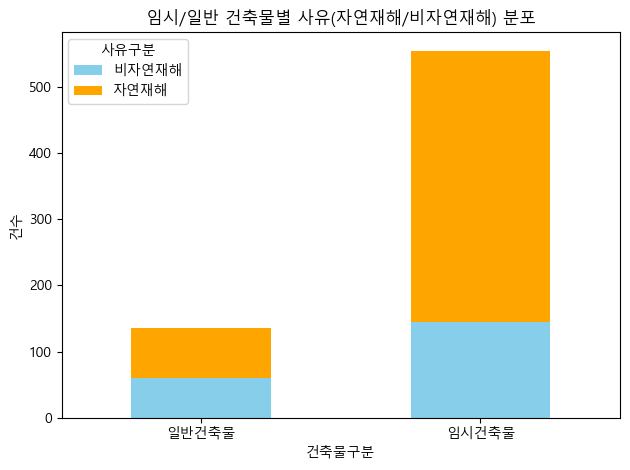

In [15]:
# 임시/일반 건축물별로 사유를 자연재해/비자연재해로 구분
import pandas as pd
import matplotlib.pyplot as plt

# 자연재해 키워드 정의
disaster_keywords = ['호우', '폭우', '태풍', '지진', '홍수', '강풍', '폭설', '산사태', '낙뢰', '풍수해', '자연재해']

def is_natural_disaster(reason):
    if pd.isnull(reason):
        return '비자연재해'
    for kw in disaster_keywords:
        if kw in str(reason):
            return '자연재해'
    return '비자연재해'

merged_df['사유구분'] = merged_df['RSN_'].apply(is_natural_disaster)

# 임시/일반 건축물별 자연재해/비자연재해 분포 집계
cross_tab = pd.crosstab(merged_df['건축물구분'], merged_df['사유구분'])
print(cross_tab)

# 시각화
cross_tab.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('임시/일반 건축물별 사유(자연재해/비자연재해) 분포')
plt.xlabel('건축물구분')
plt.ylabel('건수')
plt.xticks(rotation=0)
plt.legend(title='사유구분')
plt.tight_layout()
plt.show()

```
platPlc : 주소
strctCdNm : 구조
etcStrct : 자재
roofCdNm : 지붕 코드 ex) (철근)콘크리트
etcRoof : 기타지붕(?) ex) (철근)콘크리트
vlRat : 용적률(%)
pmsDay : 허가일
stcnsDay : 착공일
useAprDay : 사용승인일
pmsnoYear : 허가번호년
grndFlrCnt : 지상층수
```

In [16]:
final_df = pd.read_csv("data/merged_data_with_details.csv", encoding='utf-8-sig')
final_df

,Unnamed: 0,ADDR,bun,ji,region_cd,소방청 / 화재·구조·구급 통계시스템,OCRN_YMD,DAM_AMT,DCSD_CNT,OCRN_MM,...,XMAP_CRTS,SN,GEOM,INJPSN_CNT,platPlc,strctCdNm,etcRoof,stcnsDay,grndFlrCnt,stcnsDay_final
0,0,강원특별자치도 속초시 영랑동 1-6,1.0,6.0,5121010100,2014.0,3.0,2000,0,9.0,...,14315719.69,394,POINT(14315719.689200001 4609705.2095999997),0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,강원특별자치도 양양군 서면 서림리 산 1-19,1.0,19.0,5183031035,2015.0,25.0,75000,0,8.0,...,14306516.68,435,POINT(14306516.6843 4574806.1580999997),0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,강원특별자치도 영월군 주천면 판운리 1377-17,1377.0,17.0,5175036022,2016.0,2.0,10000,0,2.0,...,14284882.74,440,POINT(14284882.743100001 4479360.8031000001),0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,강원특별자치도 춘천시 서면 덕두원리 산 29-3,29.0,3.0,5111035028,2015.0,25.0,40000,0,7.0,...,14212544.11,430,POINT(14212544.1097 4558907.5335999997),0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,강원특별자치도 춘천시 서면 덕두원리 산 4-1,4.0,1.0,5111035028,2015.0,25.0,60000,0,7.0,...,14212941.97,429,POINT(14212941.965600001 4561313.9031999996),0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,686,경상남도 고성군 회화면 녹명리 산98,98.0,NaN,4882040026,2021.0,5.0,0,0,7.0,...,14289121.01,710,POINT(14289121.0101 4173214.3226999999),0,NaN,NaN,NaN,NaN,NaN,NaN
687,687,경상남도 고성군 마암면 성전리 산78,78.0,NaN,4882041027,2021.0,5.0,0,0,7.0,...,14284057.31,711,POINT(14284057.3091 4174485.0029000002),0,경상남도 고성군 마암면 성전리 78-1번지,일반목구조,"토와, 세와, 스레트",,1.0,1935.0
688,688,전라남도 여수시 소라면 죽림리 1122-2,1122.0,2.0,4613031022,2021.0,7.0,0,0,7.0,...,14208748.17,712,POINT(14208748.1708 4132169.8108000001),0,NaN,NaN,NaN,NaN,NaN,NaN
689,689,경상남도 고성군 마암면 화산리 산47,47.0,NaN,4882041024,2021.0,23.0,0,0,8.0,...,14287240.60,713,POINT(14287240.601299999 4172758.1538999998),0,NaN,NaN,NaN,NaN,NaN,NaN


사유유형       간헐적 자연재해   기타  단발적 자연재해
건물그룹                              
부실/불법 건축물       397  149        32
정상 건축물           57   55         1


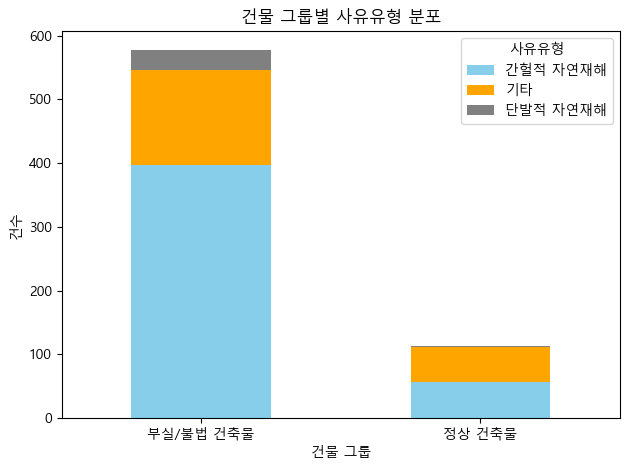

In [17]:
# final_df에서 건물 착공일 및 사유 기준 그룹별 시각화
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows 기준, 나눔고딕 사용)
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# 착공일 기준 그룹 분류 함수
def get_building_group(x):
    try:
        if pd.isnull(x) or str(x).strip() == '':
            return '부실/불법 건축물'
        year = int(str(x)[:4])
        if year < 2000:
            return '부실/불법 건축물'
        else:
            return '정상 건축물'
    except:
        return '부실/불법 건축물'

final_df['건물그룹'] = final_df['stcnsDay_final'].apply(get_building_group)

# 사유 분류 함수
intermittent_keywords = ['홍수', '폭설', '폭우', '호우', '강풍', '풍수해']
oneoff_keywords = ['지진', '태풍', '낙뢰', '산사태']
def reason_type(reason):
    if pd.isnull(reason):
        return '기타'
    for kw in intermittent_keywords:
        if kw in str(reason):
            return '간헐적 자연재해'
    for kw in oneoff_keywords:
        if kw in str(reason):
            return '단발적 자연재해'
    return '기타'

final_df['사유유형'] = final_df['RSN_'].apply(reason_type)

# 그룹별 사유유형 분포 집계
cross_tab = pd.crosstab(final_df['건물그룹'], final_df['사유유형'])
print(cross_tab)

# 시각화
cross_tab.plot(kind='bar', stacked=True, color=['skyblue', 'orange', 'gray'])
plt.title('건물 그룹별 사유유형 분포')
plt.xlabel('건물 그룹')
plt.ylabel('건수')
plt.xticks(rotation=0)
plt.legend(title='사유유형')
plt.tight_layout()
plt.show()

In [18]:
# POINT(14334427.3873 4424968.5817999998) 형식의 지오메트리 좌표를 위도/경도로 변환
from pyproj import Transformer
import re

geom_str = "POINT(14334427.3873 4424968.5817999998)"
# 정규식으로 x, y 추출
match = re.match(r"POINT\\(([-0-9.]+) ([-0-9.]+)\\)", geom_str)
if match:
    x = float(match.group(1))
    y = float(match.group(2))
    transformer = Transformer.from_crs("EPSG:3857", "EPSG:4326", always_xy=True)
    lon, lat = transformer.transform(x, y)
    print(f"위도: {lat}, 경도: {lon}")
else:
    print("좌표 추출 실패")

좌표 추출 실패


In [19]:
# folium으로 사고 위치 시각화 (사유별 색상 구분)
import pandas as pd
import folium
from pyproj import Transformer

# 데이터 읽기
accident_df = pd.read_csv('data/붕괴사고.csv', encoding='utf-8-sig')

# 좌표 변환기 (EPSG:3857 → WGS84)
transformer = Transformer.from_crs("EPSG:3857", "EPSG:4326", always_xy=True)

# 위도/경도 컬럼 생성
def xy_to_latlon(row):
    try:
        x, y = float(row['XMAP_CRTS']), float(row['YMAP_CRTS'])
        lon, lat = transformer.transform(x, y)
        return pd.Series({'lat': lat, 'lon': lon})
    except:
        return pd.Series({'lat': None, 'lon': None})

accident_df[['lat', 'lon']] = accident_df.apply(xy_to_latlon, axis=1)

# 사유 분류 함수
intermittent_keywords = ['홍수', '폭설', '폭우', '호우', '강풍', '풍수해']
oneoff_keywords = ['지진', '태풍', '낙뢰', '산사태']
def reason_type(reason):
    if pd.isnull(reason):
        return '기타'
    for kw in intermittent_keywords:
        if kw in str(reason):
            return '간헐적 자연재해'
    for kw in oneoff_keywords:
        if kw in str(reason):
            return '단발적 자연재해'
    if '공사' in str(reason):
        return '공사 중 사고'
    if '부실' in str(reason) or '노후' in str(reason):
        return '부실 건축'
    return '기타'

accident_df['사유유형'] = accident_df['RSN_'].apply(reason_type)

# 색상 매핑
color_map = {
    '간헐적 자연재해': 'blue',
    '단발적 자연재해': 'orange',
    '공사 중 사고': 'red',
    '부실 건축': 'purple',
    '기타': 'gray'
}

# folium 지도 생성 (중심: 첫 사고 위치)
center = [accident_df['lat'].mean(), accident_df['lon'].mean()]
m = folium.Map(location=center, zoom_start=11)

# 사고별 마커 추가
for _, row in accident_df.iterrows():
    if pd.notnull(row['lat']) and pd.notnull(row['lon']):
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=5,
            color=color_map.get(row['사유유형'], 'gray'),
            fill=True,
            fill_color=color_map.get(row['사유유형'], 'gray'),
            fill_opacity=0.7,
            popup=row.get('RSN_', '')
        ).add_to(m)

m

In [20]:
# data/merged_data_with_details.csv에서 stcnsDay_final이 없는 데이터만 folium 지도에 시각화
import pandas as pd
import folium
from pyproj import Transformer

df = pd.read_csv('data/merged_data_with_details.csv', encoding='utf-8-sig')

# stcnsDay_final이 결측치 또는 빈 문자열인 데이터만 필터링
filtered_df = df[df['stcnsDay_final'].isnull() | (df['stcnsDay_final'].astype(str).str.strip() == '')].copy()

# 좌표 변환기 (EPSG:3857 → WGS84)
transformer = Transformer.from_crs("EPSG:3857", "EPSG:4326", always_xy=True)

# 위도/경도 컬럼 생성
def xy_to_latlon(row):
    try:
        x, y = float(row['XMAP_CRTS']), float(row['YMAP_CRTS'])
        lon, lat = transformer.transform(x, y)
        return pd.Series({'lat': lat, 'lon': lon})
    except:
        return pd.Series({'lat': None, 'lon': None})

filtered_df[['lat', 'lon']] = filtered_df.apply(xy_to_latlon, axis=1)

# 사유 분류 함수
intermittent_keywords = ['홍수', '폭설', '폭우', '호우', '강풍', '풍수해']
oneoff_keywords = ['지진', '태풍', '낙뢰', '산사태']
def reason_type(reason):
    if pd.isnull(reason):
        return '기타'
    for kw in intermittent_keywords:
        if kw in str(reason):
            return '간헐적 자연재해'
    for kw in oneoff_keywords:
        if kw in str(reason):
            return '단발적 자연재해'
    if '공사' in str(reason):
        return '공사 중 사고'
    if '부실' in str(reason) or '노후' in str(reason):
        return '부실 건축'
    return '기타'

filtered_df['사유유형'] = filtered_df['RSN_'].apply(reason_type)

# 색상 매핑
color_map = {
    '간헐적 자연재해': 'blue',
    '단발적 자연재해': 'orange',
    '공사 중 사고': 'red',
    '부실 건축': 'purple',
    '기타': 'gray'
}

# folium 지도 생성 (중심: 사고 위치 평균)
if filtered_df['lat'].notnull().any() and filtered_df['lon'].notnull().any():
    center = [filtered_df['lat'].mean(), filtered_df['lon'].mean()]
else:
    center = [37.5665, 126.9780]  # 서울시청 좌표(예시)
m = folium.Map(location=center, zoom_start=11)

# 사고별 마커 추가
for _, row in filtered_df.iterrows():
    if pd.notnull(row['lat']) and pd.notnull(row['lon']):
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=5,
            color=color_map.get(row['사유유형'], 'gray'),
            fill=True,
            fill_color=color_map.get(row['사유유형'], 'gray'),
            fill_opacity=0.7,
            popup=row.get('RSN_', '')
        ).add_to(m)

m

In [22]:
# data/merged_data_with_details.csv에서 stcnsDay_final이 있는 데이터만 folium 지도에 시각화
import pandas as pd
import folium
from pyproj import Transformer

df = pd.read_csv('data/merged_data_with_details.csv', encoding='utf-8-sig')

# stcnsDay_final이 결측치 또는 빈 문자열이 아닌 데이터만 필터링
filtered_df = df[df['stcnsDay_final'].notnull() & (df['stcnsDay_final'].astype(str).str.strip() != '')].copy()

# 좌표 변환기 (EPSG:3857 → WGS84)
transformer = Transformer.from_crs("EPSG:3857", "EPSG:4326", always_xy=True)

# 위도/경도 컬럼 생성
def xy_to_latlon(row):
    try:
        x, y = float(row['XMAP_CRTS']), float(row['YMAP_CRTS'])
        lon, lat = transformer.transform(x, y)
        return pd.Series({'lat': lat, 'lon': lon})
    except:
        return pd.Series({'lat': None, 'lon': None})

filtered_df[['lat', 'lon']] = filtered_df.apply(xy_to_latlon, axis=1)

# 사유 분류 함수
intermittent_keywords = ['홍수', '폭설', '폭우', '호우', '강풍', '풍수해']
oneoff_keywords = ['지진', '태풍', '낙뢰', '산사태']
def reason_type(reason):
    if pd.isnull(reason):
        return '기타'
    for kw in intermittent_keywords:
        if kw in str(reason):
            return '간헐적 자연재해'
    for kw in oneoff_keywords:
        if kw in str(reason):
            return '단발적 자연재해'
    if '공사' in str(reason):
        return '공사 중 사고'
    if '부실' in str(reason) or '노후' in str(reason):
        return '부실 건축'
    return '기타'

filtered_df['사유유형'] = filtered_df['RSN_'].apply(reason_type)

# 색상 매핑
color_map = {
    '간헐적 자연재해': 'blue',
    '단발적 자연재해': 'orange',
    '공사 중 사고': 'red',
    '부실 건축': 'purple',
    '기타': 'gray'
}

# folium 지도 생성 (중심: 사고 위치 평균)
if filtered_df['lat'].notnull().any() and filtered_df['lon'].notnull().any():
    center = [filtered_df['lat'].mean(), filtered_df['lon'].mean()]
else:
    center = [37.5665, 126.9780]  # 서울시청 좌표(예시)
m = folium.Map(location=center, zoom_start=11)

# 사고별 마커 추가
for _, row in filtered_df.iterrows():
    if pd.notnull(row['lat']) and pd.notnull(row['lon']):
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=5,
            color=color_map.get(row['사유유형'], 'gray'),
            fill=True,
            fill_color=color_map.get(row['사유유형'], 'gray'),
            fill_opacity=0.7,
            popup=row.get('RSN_', '')
        ).add_to(m)

m